# Popular Data Science Questions

Our goal in this project is to use Data Science Stack Exchange to determine what content should a data science education company create, based on interest by subject.

## Stack Exchange
On DSSE's help center's section on questions , we can read that we should:

- Avoid subjective questions.
- Ask practical questions about Data Science — there are adequate sites for theoretical questions.
- Ask specific questions.
- Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to our goal.

In the help center we also learned that in addition to the sites mentioned in the Learn section, there are other two sites that are relevant:

- Open Data (Dataset requests)
- Computational Science (Software packages and algorithms in applied mathematics)

### What information is available in each post?
Looking, just as an example, at this question, some of the information we see is:

For both questions and answers:
- The posts's score;
- The posts's title;
- The posts's author;
- The posts's body;

For questions only:
- How many users have it on their "
- The last time the question as active;
- How many times the question was viewed;
- Related questions;
- The question's tags;

## Exploring the Data

In [1]:
import pandas as pd
import datetime as dt
file = pd.read_csv('2019_questions.csv')

In [2]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [3]:
file['FavoriteCount'].value_counts()

1.0     953
2.0     205
0.0     175
3.0      43
4.0      12
5.0       8
7.0       4
6.0       4
11.0      1
16.0      1
8.0       1
Name: FavoriteCount, dtype: int64

## Cleaning the Data

In [4]:
file['FavoriteCount'].fillna(0, inplace=True)
file['FavoriteCount'].value_counts()
file['FavoriteCount'] = file['FavoriteCount'].astype(int)

In [5]:
file['CreationDate'] = pd.to_datetime(file['CreationDate'])

In [6]:
file['Tags'] = file['Tags'].str.replace('><',',').str.replace('>','').str.replace('<','').str.strip().str.split(',')

In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [8]:
file.head(5)   

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


## Most Used and Most Viewed
We'll begin by counting how many times each tag was used

In [9]:
tag_list=[]
for row in file['Tags']:
    for i in range(len(row)):
        if row[i] not in tag_list:
            tag_list.append(row[i])
        else: pass

In [10]:
tag_used = {}

for row in file['Tags']:
    for i in range(len(row)):
        if row[i] not in tag_used:
            tag_used[row[i]] = 1
        elif row[i] in tag_used:
            tag_used[row[i]] +=1

In [11]:
tag_used = pd.DataFrame.from_dict(tag_used, orient="index")
tag_used.rename(columns={0: "Count"}, inplace=True)
tag_used.head(10)

,Count
machine-learning,2693
data-mining,217
regression,347
linear-regression,175
regularization,50
python,1814
time-series,466
forecast,34
forecasting,85
scikit-learn,540


In [12]:
most_used = tag_used.sort_values(by="Count").tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


<AxesSubplot:>

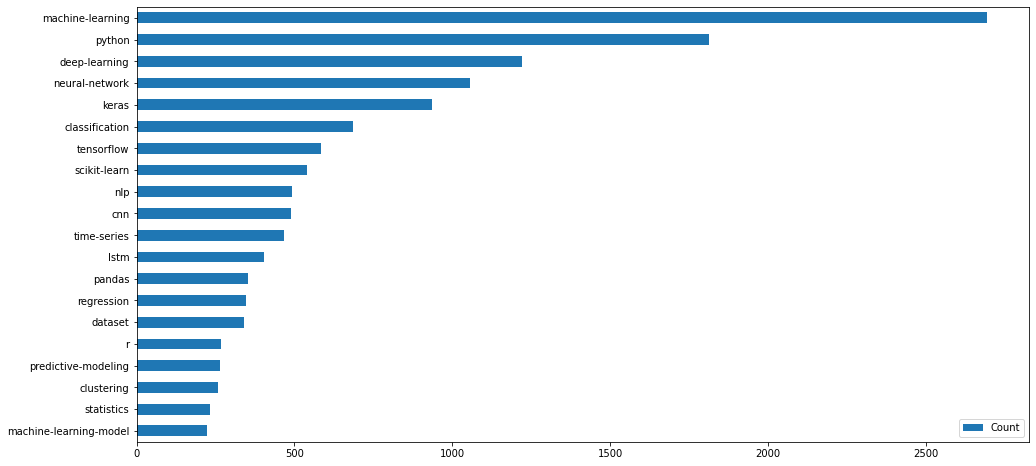

In [13]:
most_used.plot(kind="barh", figsize=(16,8))

<AxesSubplot:>

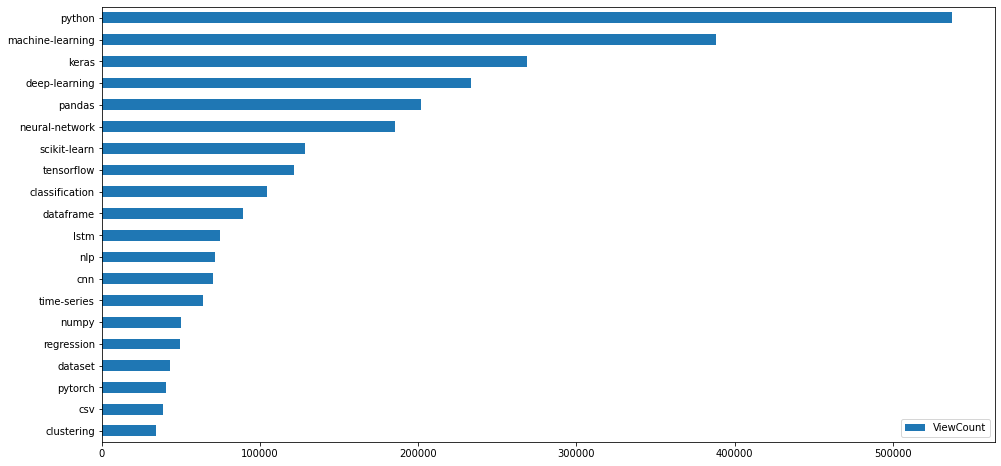

In [14]:
tag_viewed = {}

for index, row in file.iterrows():
    for tag in row['Tags']:
        if tag in tag_viewed:
            tag_viewed[tag] += row['ViewCount']
        else:
            tag_viewed[tag] = row['ViewCount']


tag_viewed = pd.DataFrame.from_dict(tag_viewed, orient="index")
tag_viewed.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_viewed.sort_values(by="ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8))

## Relations Between Tags
One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together.

In [15]:
r_tags = pd.DataFrame(index=tag_list, columns=tag_list)
r_tags.iloc[0:4,0:4]

,machine-learning,data-mining,regression,linear-regression
machine-learning,NaN,NaN,NaN,NaN
data-mining,NaN,NaN,NaN,NaN
regression,NaN,NaN,NaN,NaN
linear-regression,NaN,NaN,NaN,NaN


Because the dataframe is quite large we will focus our attention on the most used tags.

In [16]:
r_tags = r_tags.fillna(0)
for tags in file["Tags"]:
    r_tags.loc[tags, tags] += 1

used_tag_relations = r_tags.loc[most_used.index,most_used.index]
used_tag_relations

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


/var/folders/44/qpn0kl1904v7csf4k677jztr0000gn/T/ipykernel_76340/1947636972.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  used_tag_relations.iloc[i,i] = pd.np.NaN


<AxesSubplot:>

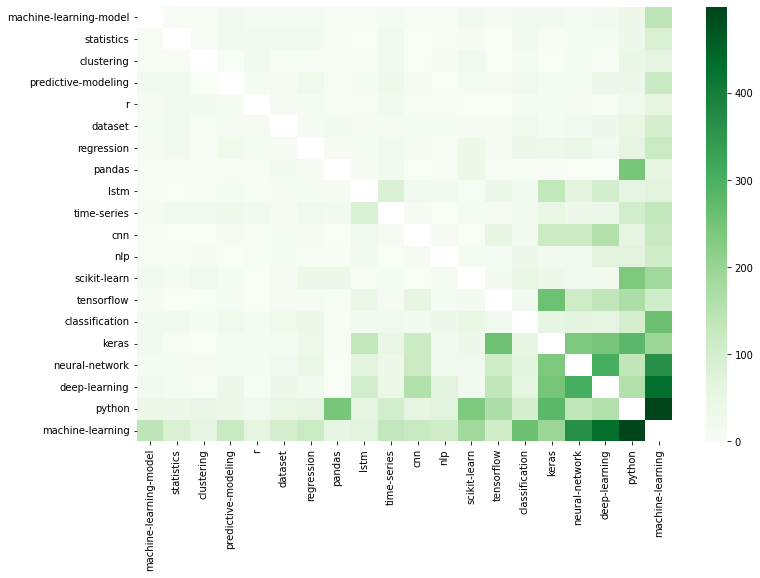

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for i in range(used_tag_relations.shape[0]):
    used_tag_relations.iloc[i,i] = pd.np.NaN

plt.figure(figsize=(12,8))
sns.heatmap(used_tag_relations, cmap="Greens", annot=False)

The most used tags that seem to have the strongest relationships are shown by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

### Digging Deeper

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning. Before we officially make our recommendation, it would be nice to solidify our findings with additional proof. More specifically we need to figure out if Deep Learning is just a fad or not.



In [18]:
questions = pd.read_csv('all_questions.csv')
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            21576 non-null  int64 
 1   CreationDate  21576 non-null  object
 2   Tags          21576 non-null  object
dtypes: int64(1), object(2)
memory usage: 505.8+ KB


In [19]:
questions['Tags'] = questions['Tags'].str.replace('><',',').str.replace('>','').str.replace('<','').str.strip().str.split(',')

In [20]:
questions.head(5)

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


Because our goal is to see if Deep Learning is a fad or not we will track the interest in deep learning across time.

We will:

- Count how many deep learning questions are asked per time period.
- The total amount of questions per time period.
- How many deep learning questions there are relative to the total amount of questions per time period.

Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

In [24]:
questions['DeepLearning'] = 0
DL_define = ["lstm", "cnn", "scikit-learn", "tensorflow","keras", "neural-network", "deep-learning"]


def identify_dl(tags):
    for tag in tags:
        if tag in DL_define:
            return 1
    return 0

questions["DeepLearning"] = questions["Tags"].apply(identify_dl)

In [25]:
questions.head(10)

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
5,45428,2019-02-12 05:43:18,[cnn],1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0
7,45431,2019-02-12 07:26:56,[machine-learning],0
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",1
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1


In [55]:
questions['CreationDate'] = pd.to_datetime(questions['CreationDate'], format='%Y-%m-%d %H:%M:%S')
questions['Quarter'] = questions['CreationDate'].dt.to_period('Q')
questions = questions.loc[(questions['CreationDate'] < '2020-01-01')]
questions.head(10)

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,2019Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,2019Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,2019Q1
3,45426,2019-02-12 04:51:49,[keras],1,2019Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,2019Q1
5,45428,2019-02-12 05:43:18,[cnn],1,2019Q1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0,2019Q1
7,45431,2019-02-12 07:26:56,[machine-learning],0,2019Q1
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",1,2019Q1
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1,2019Q1


In [62]:
questions['Total Questions'] = 1
dl_quarter = questions.groupby(['Quarter'], as_index=False).sum()
dl_quarter['Deep Learning Ratio'] = dl_quarter['DeepLearning']/dl_quarter['Total Questions']
dl_quarter

,Quarter,Id,DeepLearning,Total Questions,Deep Learning Ratio
0,2014Q2,50489,9,157,0.057325
1,2014Q3,174820,13,189,0.068783
2,2014Q4,549678,21,216,0.097222
3,2015Q1,962080,18,190,0.094737
4,2015Q2,1669522,28,284,0.098592
5,2015Q3,2191015,45,311,0.144695
6,2015Q4,3419181,66,382,0.172775
7,2016Q1,5299831,110,516,0.213178
8,2016Q2,6085831,109,518,0.210425
9,2016Q3,7829472,161,585,0.275214


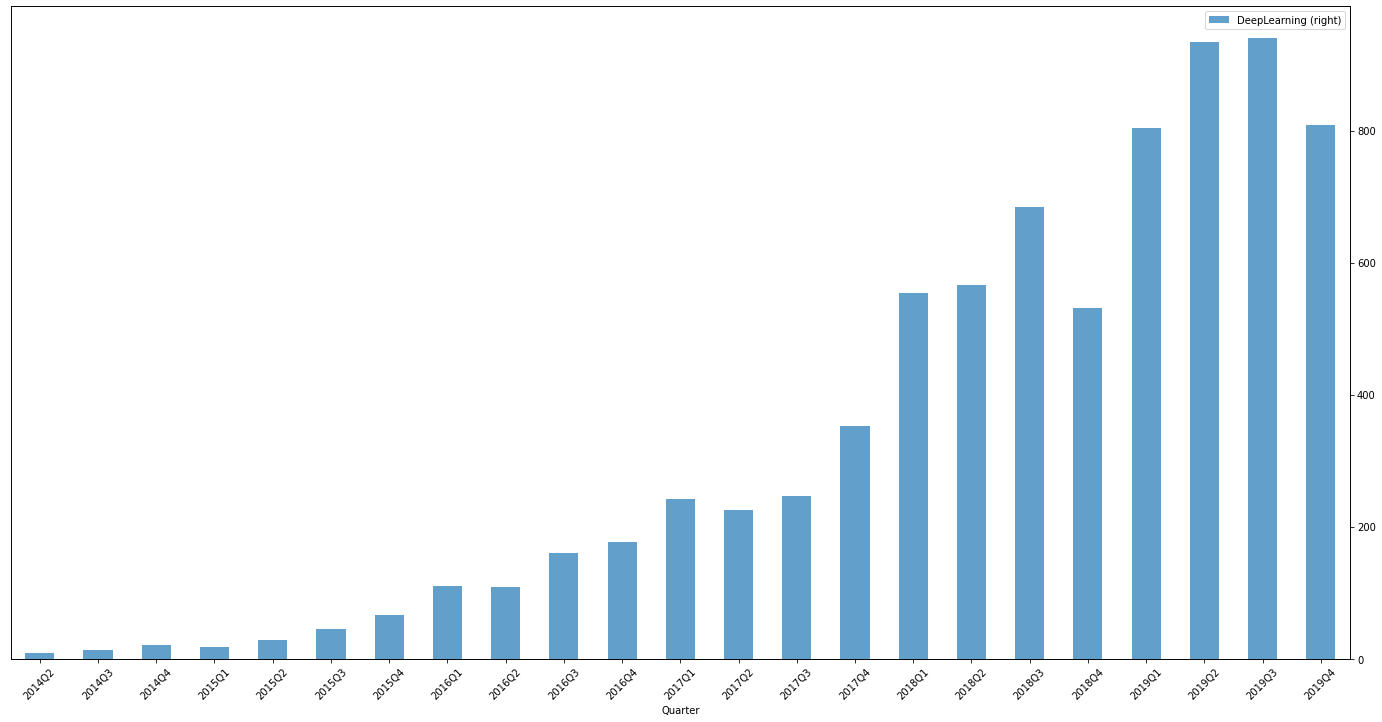

In [58]:
ax2 = dl_quarter.plot(x="Quarter", y="DeepLearning",
                     kind="bar", secondary_y=True, alpha=0.7, rot=45, figsize=(24,12))

It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.